<h1>Лабораторная работа №1. Первичный анализ данных</h1>
<h2>Основные задания</h2>

<blockquote>
    <i>0. Загрузить выборку из файла 'VarN.txt', где N – номер варианта, он же номер в списке подгруппы</i>
</blockquote>

In [1]:
import matplotlib.pyplot as plot
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import scipy.stats as sps
import random
plot.style.use('bmh')

data = np.loadtxt('var3.txt')

mean = lambda val: np.mean(val) 
std = lambda val: np.std(val) 
var = lambda val: np.var(val) 
median = lambda val: np.median(val)
quantile25 = lambda val: np.quantile(val, 0.25)
quantile75 = lambda val: np.quantile(val, 0.75)
skew = lambda val: ((((pd.DataFrame(val)).skew()).to_string()).split())[1]
kurt = lambda val: ((((pd.DataFrame(val)).kurtosis()).to_string()).split())[1]
amax = lambda val: np.amax(val)
amin = lambda val: np.amin(val)

functionsList = [mean, std, var, median, quantile25, quantile75, skew, kurt, amax, amin]

<blockquote>
<i>1. Провести визуальный анализ выборки, то есть вывести: 
    
    а) график реализации
    б) ящик с усами
    в) гистограмму (постройте несколько гистограмм с разным числом интервалов:
    
        а) небольшим: 2-3
        б) средним – обычно выбирается автоматически
        в) большим: порядка 30 или даже более)
Проинтерпретировать полученные иллюстрации. Попробуйте предположить, к какому распределению принадлежит выборка.</i>
    </blockquote>

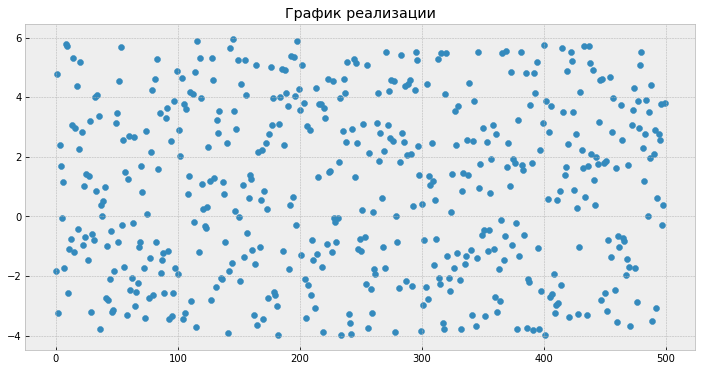

In [2]:
plot.figure(figsize=(12, 6))
plot.scatter(range(len(data)), data)
plot.title('График реализации')
plot.show()

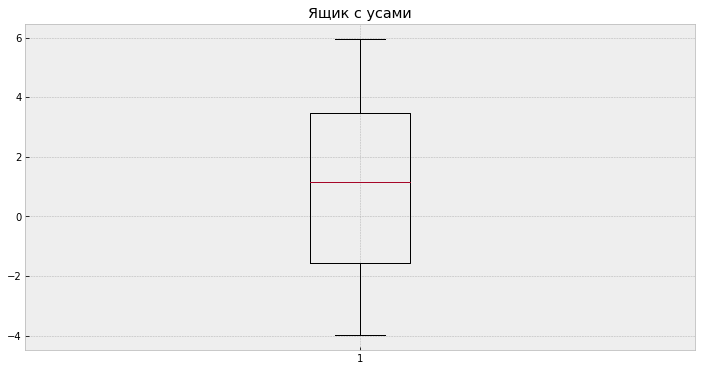

In [3]:
plot.figure(figsize=(12, 6))
plot.boxplot(data)
plot.title('Ящик с усами')
plot.show()

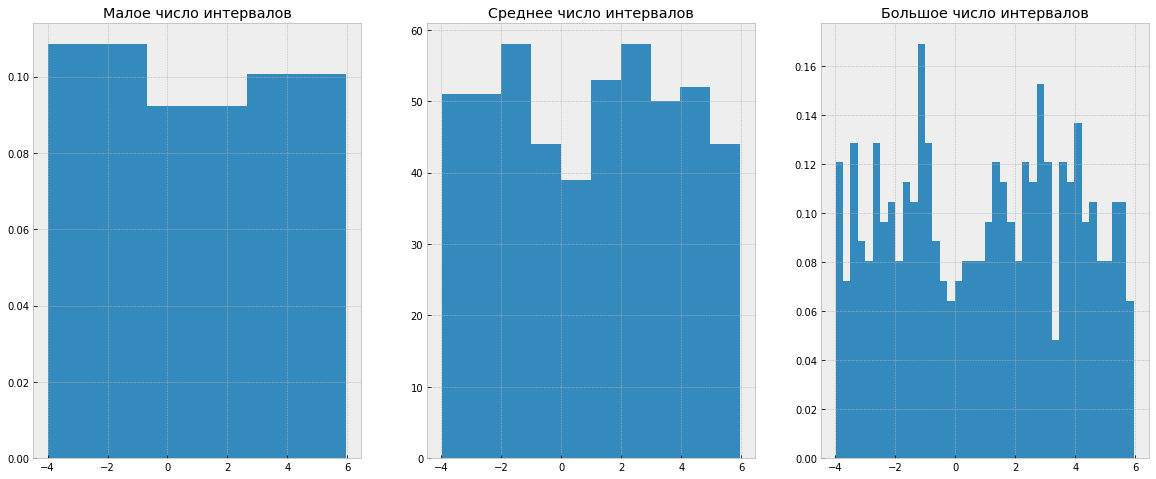

In [4]:
frame, gist = plot.subplots(1, 3, figsize=(20, 8))

gist[0].hist(data, density=1, bins=3)
gist[0].set_title('Малое число интервалов')

gist[1].hist(data, bins='auto')
gist[1].set_title('Среднее число интервалов')

gist[2].hist(data, density=1, bins=40)
gist[2].set_title('Большое число интервалов')
plot.show()

<blockquote>
    <b>Согласно графикам реализации и гистограммам данная выборка предположительно принадлежит равномерному распределению</b>
</blockquote>

<blockquote>
    <i>2. Вычислить числовые характеристики выборки: среднее, стандартное отклонение, дисперсию,
медиану, первую и третью квартиль, коэффициент асимметрии, эксцесса, минимальное и
максимальное значение выборки. Какие можно сделать выводы?</i>
</blockquote>

In [5]:
values1 = [[0] * 2 for i in range(10)]

for i in range(len(values1)):
    values1[i] = functionsList[i](data)

df = pd.DataFrame(values1,
                  index=pd.Index(['Среднее', 'Стандартное отклонение', 'Дисперсия', 'Медиана', 'Первая квартиль', 'Третья квартиль', 'Коэффициент асимметрии', 'Эксцесс', 'Максимальное значение выборки', 'Минимальное значение выборки']),
                  columns=['Исходные данные'])
df.style

,Исходные данные
Среднее,0.943443
Стандартное отклонение,2.856339
Дисперсия,8.158670
Медиана,1.158803
Первая квартиль,-1.565664
Третья квартиль,3.463819
Коэффициент асимметрии,-0.024381
Эксцесс,-1.237918
Максимальное значение выборки,5.957706
Минимальное значение выборки,-3.993637


<h2>Бонусные задания</h2>
<h3>Проверка правила 3σ</h3>

<blockquote>
    <i>3. Вычислите, какова доля тех наблюдений, которые попали в интервал $[\bar{x}-3 s, \bar{x}+3 s]$, где $\bar{x}$ - выборочное среднее, s – выборочная оценка стандартного отклонения. Что можно сказать про теоретическую вероятность $P\{\xi \in[\mu-3 \sigma, \mu+3 \sigma]\}$? Согласуется ли практический результат с теорией?</i>
</blockquote>

In [6]:
seg = [np.mean(data) - 3 * np.std(data), np.mean(data) + 3 * np.std(data)]

def fun(x):
    if(seg[0] <= x <= seg[1]):
        return 1;
    else:
        return 0;
    
temp = list(filter(fun, data))
print('Доля наблюдений: {}%'.format((len(data) / len(temp)) * 100))

Доля наблюдений: 100.0%


<blockquote>
    Доля наблюдений, которые попали в интервал $[\bar{x}-3 s, \bar{x}+3 s]$ состовляет 100%. При этом теоретическая вероятность $P\{\xi \in[\mu-3 \sigma, \mu+3 \sigma]\}$ даёт оценку того,  что случайная величина отклонится от своего математического ожидания более чем на три среднеквадратических отклонения, практически равна нулю.<br>
    <b>Согласно проведённым расчётам, теория согласуется с практическим результатам на данной выборке.</b>
</blockquote>

<h3>Подгонка закона распределения</h3>

<blockquote>
    <i>4. По гистограмме и вычисленным числовых характеристикам попробуйте сделать вывод о принадлежности выборки к одному из следующих распределений: нормальное, экспоненциальное, Лапласа, Вейбулла, равномерное.</i>
</blockquote>

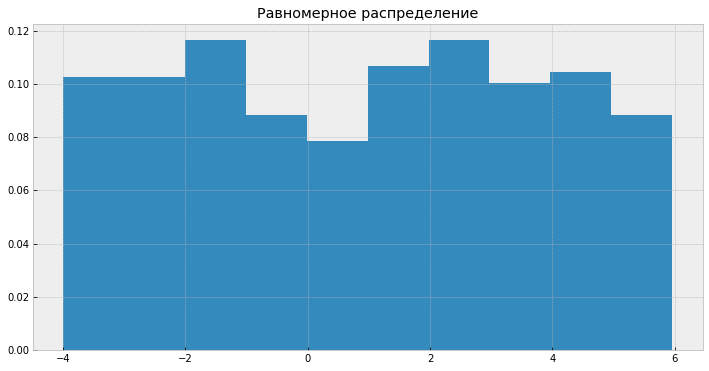

In [7]:
plot.figure(figsize=(12, 6))
plot.hist(data, density=1)
plot.title('Равномерное распределение')
plot.show()

<blockquote>
    <b>Данная выборка принадлежит равномерному распределению</b>
</blockquote>

<blockquote>
    <i>5. Проверить гипотезы согласия о принадлежности выборки к одному из 5 указанных в пункте 4 распределений. Рекомендуемые тесты: хи-квадрат Пирсона, Колмогорова-Смирнова (можно использовать другие тесты согласия). Сделать вывод о том, к какому распределению она принадлежит, с какими параметрами.</i>
</blockquote>

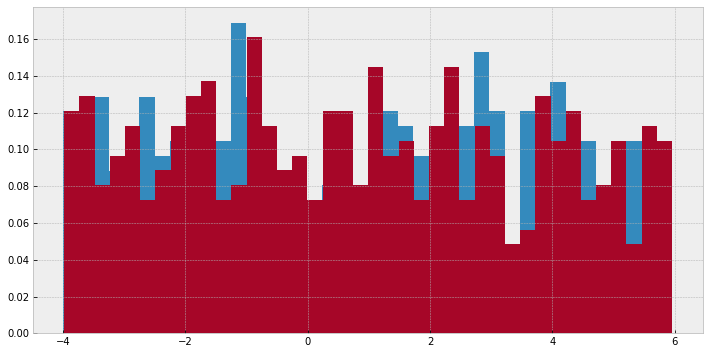

KstestResult(statistic=0.554, pvalue=0.8942115768463074)

In [8]:
gdata = np.random.uniform(np.amin(data), np.amax(data), 500)

plot.figure(figsize=(12, 6))
plot.hist(data, density=1, bins=40)
plot.hist(gdata, density=1, bins=40)
plot.show()

sps.kstest(data, sps.uniform.cdf(sps.uniform.ppf([.500])))
#sps.kstest(data, gdata)

<blockquote>
    Согласно тесту Колмогорова-Смирнова отклонение от нормального распределения считается существенным при значении р-value $<$ 0.05<br>
    В нашем случае при проверке данной выборки данных и сгенерированными данными при равномерном распределениии тест выдал p-value равное 0.56,то есть вероятность ошибки не является значимой.<br>
    Следовательно данная выборка принадлежит равномерному распределению.
</blockquote>

<h3>Работа с пропусками</h3>

<blockquote>
    <i>6. Случайным образом внести в выборку пропуски (долю пропущенных наблюдений
выберете в пределах 0.2 0.5).<br>
    7. Вычислить числовые характеристики из пункта 2, игнорируя пропущенные значения,
т.е. считайте, что у вас новая выборка, состоящая из элементов, которые остались непропущенными.
Насколько сильно посчитанные числовые характеристики отличаются от результатов, полученных
по полным данным? Почему?</i>
</blockquote>

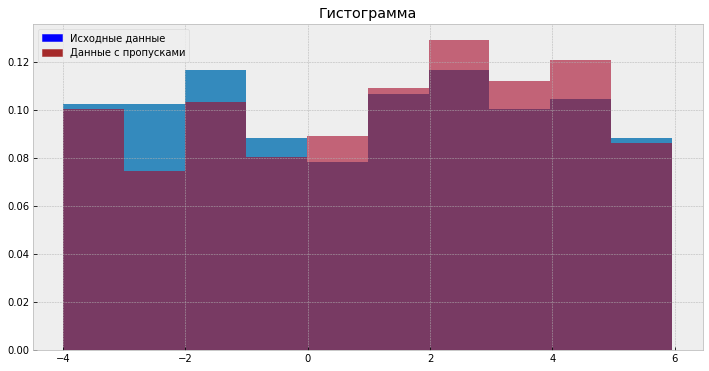

,Исходные данные,Данные с пропусками
Среднее,0.943443,1.174097
Стандартное отклонение,2.856339,2.817898
Дисперсия,8.158670,7.940549
Медиана,1.158803,1.429081
Первая квартиль,-1.565664,-1.201006
Третья квартиль,3.463819,3.548299
Коэффициент асимметрии,-0.024381,-0.174098
Эксцесс,-1.237918,-1.147999
Максимальное значение выборки,5.957706,5.957706
Минимальное значение выборки,-3.993637,-3.993637


In [9]:
baddata = list(data)
sub = 0.30

for i in range(0, int(len(data) * sub)):
        baddata.remove(random.choice(baddata))

plot.figure(figsize=(12, 6))
plot.hist(data, density=1, bins=10)
plot.hist(baddata, density=1, bins=10)
plot.title('Гистограмма')

blue = mpatches.Patch(color='Blue', label='Исходные данные')
red = mpatches.Patch(color='#A52A2A', label='Данные с пропусками')
plot.legend(handles=[blue, red])
plot.show()
    
values = [[0] * 2 for i in range(10)]

for i in range(len(values)):
    for j in range(len(values[i])):
        if j == 0:
            values[i][j] = functionsList[i](data)
        else:
            values[i][j] = functionsList[i](baddata)

df = pd.DataFrame(values,
                  index=pd.Index(['Среднее', 'Стандартное отклонение', 'Дисперсия', 'Медиана', 'Первая квартиль', 'Третья квартиль', 'Коэффициент асимметрии', 'Эксцесс', 'Максимальное значение выборки', 'Минимальное значение выборки']),
                  columns=['Исходные данные', 'Данные с пропусками'])
df.style

<blockquote>
    <i>8. Заполнить пропущенные значения средним арифметическим по присутствующим
данным. Вычислить числовые характеристики из пункта 2. Насколько сильно посчитанные числовые
характеристики отличаются от результатов, полученных в пунктах 2 и 7? Почему?</i>
</blockquote>

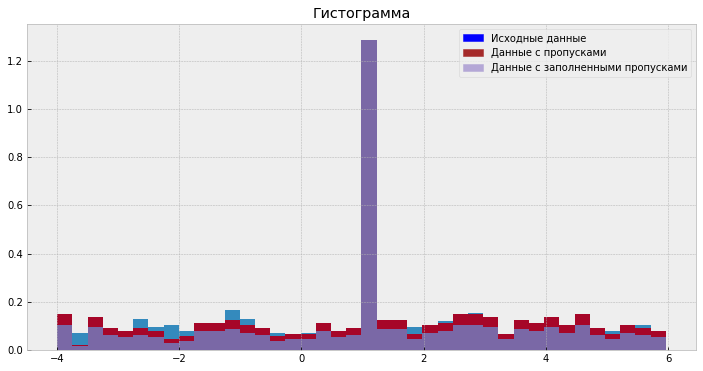

,Исходные данные,Данные с пропусками,Данные с заполненными пропусками
Среднее,0.943443,1.174097,1.174097
Стандартное отклонение,2.856339,2.817898,2.357623
Дисперсия,8.158670,7.940549,5.558384
Медиана,1.158803,1.429081,1.174097
Первая квартиль,-1.565664,-1.201006,0.002369
Третья квартиль,3.463819,3.548299,2.633602
Коэффициент асимметрии,-0.024381,-0.174098,-0.207818
Эксцесс,-1.237918,-1.147999,-0.346852
Максимальное значение выборки,5.957706,5.957706,5.957706
Минимальное значение выборки,-3.993637,-3.993637,-3.993637


In [10]:
subdata = [functionsList[0](baddata) for i in range(int(len(data) * sub))]
newdata = subdata + baddata

values = [[0] * 3 for i in range(10)]

for i in range(len(values)):
    for j in range(len(values[i])):
        if j == 0:
            values[i][j] = functionsList[i](data)
        elif j == 1:
            values[i][j] = functionsList[i](baddata)
        else:
            values[i][j] = functionsList[i](newdata)

plot.figure(figsize=(12, 6))
plot.hist(data, density=1, bins=40)
plot.hist(baddata, density=1, bins=40)
plot.hist(newdata, density=1, bins=40)
plot.title('Гистограмма')

blue = mpatches.Patch(color='Blue', label='Исходные данные')
red = mpatches.Patch(color='#A52A2A', label='Данные с пропусками')
viol = mpatches.Patch(color='#b4a7d6', label='Данные с заполненными пропусками')
plot.legend(handles=[blue, red, viol])
plot.show()
            
df = pd.DataFrame(values,
                  index=pd.Index(['Среднее', 'Стандартное отклонение', 'Дисперсия', 'Медиана', 'Первая квартиль', 'Третья квартиль', 'Коэффициент асимметрии', 'Эксцесс', 'Максимальное значение выборки', 'Минимальное значение выборки']),
                  columns=['Исходные данные', 'Данные с пропусками', 'Данные с заполненными пропусками'])
df.style

<h3>Цензурирование данных снизу</h3>

<blockquote>
    <i>10. Выбрать уровень цензурирования c = (1/3)xmax + (2/3)xmin. Все значения, меньшие c
заменить на пропуски.<br>
    11. Вычислить числовые характеристики из пункта 2, игнорируя пропущенные значения.
Насколько сильно посчитанные числовые характеристики отличаются от результатов, полученных
по полным данным? Почему?</i>
</blockquote>

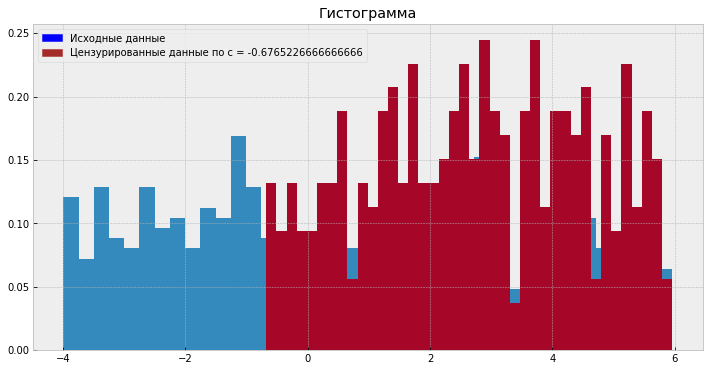

,Исходные данные,Цензурированные данные по c = -0.6765226666666666
Среднее,0.943443,2.741183
Стандартное отклонение,2.856339,1.796965
Дисперсия,8.158670,3.229084
Медиана,1.158803,2.786479
Первая квартиль,-1.565664,1.349936
Третья квартиль,3.463819,4.188573
Коэффициент асимметрии,-0.024381,-0.08689
Эксцесс,-1.237918,-1.043944
Максимальное значение выборки,5.957706,5.957706
Минимальное значение выборки,-3.993637,-0.675977


In [11]:
zenzdata = list(data)
c = (1/3)*functionsList[8](data) + (2/3)*functionsList[9](data)

for el in data:
    if el < c:
        zenzdata.remove(el)
        
values2 = [[0] * 2 for i in range(10)]

for i in range(len(values2)):
    for j in range(len(values2[i])):
        if j == 0:
            values2[i][j] = functionsList[i](data)
        else:
            values2[i][j] = functionsList[i](zenzdata)

plot.figure(figsize=(12, 6))
plot.hist(data, density=1, bins=40)
plot.hist(zenzdata, density=1, bins=40)
plot.title('Гистограмма')

blue = mpatches.Patch(color='Blue', label='Исходные данные')
red = mpatches.Patch(color='#A52A2A', label='Цензурированные данные по c = {}'.format(c))
plot.legend(handles=[blue, red])
plot.show()

df = pd.DataFrame(values2,
                  index=pd.Index(['Среднее', 'Стандартное отклонение', 'Дисперсия', 'Медиана', 'Первая квартиль', 'Третья квартиль', 'Коэффициент асимметрии', 'Эксцесс', 'Максимальное значение выборки', 'Минимальное значение выборки']),
                  columns=['Исходные данные', 'Цензурированные данные по c = {}'.format(c)])
df.style

<blockquote>
    <i>12. Заполнить пропущенные значения средним арифметическим по присутствующим
данным. Вычислить числовые характеристики из пункта 2. Адекватными ли получаются результаты?</i>
</blockquote>

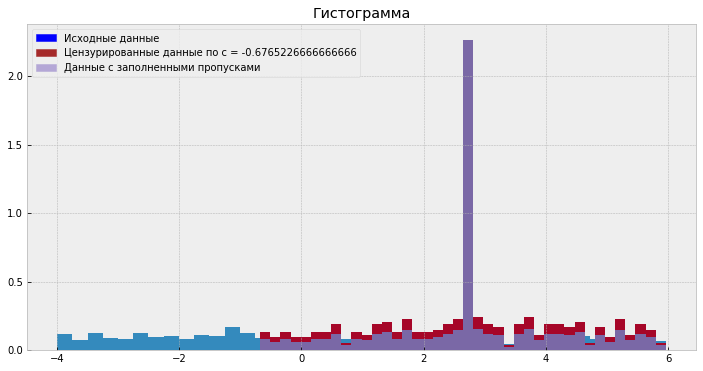

,Исходные данные,Цензурированные данные по c = -0.6765226666666666,Данные с заполненными пропусками
Среднее,0.943443,2.741183,2.741183
Стандартное отклонение,2.856339,1.796965,1.437572
Дисперсия,8.158670,3.229084,2.066614
Медиана,1.158803,2.786479,2.741183
Первая квартиль,-1.565664,1.349936,2.188946
Третья квартиль,3.463819,4.188573,3.463819
Коэффициент асимметрии,-0.024381,-0.08689,-0.108428
Эксцесс,-1.237918,-1.043944,0.065133
Максимальное значение выборки,5.957706,5.957706,5.957706
Минимальное значение выборки,-3.993637,-0.675977,-0.675977


In [12]:
subdata = [functionsList[0](zenzdata) for i in range(int(len(data) - len(zenzdata)))]
newzenzdata = subdata + zenzdata

values = [[0] * 3 for i in range(10)]

for i in range(len(values)):
    for j in range(len(values[i])):
        if j == 0:
            values[i][j] = functionsList[i](data)
        elif j == 1:
            values[i][j] = functionsList[i](zenzdata)
        else:
            values[i][j] = functionsList[i](newzenzdata)

plot.figure(figsize=(12, 6))
plot.hist(data, density=1, bins=40)
plot.hist(zenzdata, density=1, bins=40)
plot.hist(newzenzdata, density=1, bins=40)
plot.title('Гистограмма')

blue = mpatches.Patch(color='Blue', label='Исходные данные')
red = mpatches.Patch(color='#A52A2A', label='Цензурированные данные по c = {}'.format(c))
viol = mpatches.Patch(color='#b4a7d6', label='Данные с заполненными пропусками')
plot.legend(handles=[blue, red, viol])
plot.show()
            
df = pd.DataFrame(values,
                  index=pd.Index(['Среднее', 'Стандартное отклонение', 'Дисперсия', 'Медиана', 'Первая квартиль', 'Третья квартиль', 'Коэффициент асимметрии', 'Эксцесс', 'Максимальное значение выборки', 'Минимальное значение выборки']),
                  columns=['Исходные данные', 'Цензурированные данные по c = {}'.format(c), 'Данные с заполненными пропусками'])
df.style

<h3>Выбросы</h3>

<blockquote>
    <i>14. Пусть $L=x_{\min }+x_{\max }$, тогда добавить в выборку 5 элементов, больших или равных
$x_{\max }+L$, и 5 элементов, меньших или равных $x_{\min }-L$. Вычислить числовые характеристики из
пункта 2. Насколько сильно посчитанные числовые характеристики отличаются от результатов,
полученных по исходным данным? Почему?</i>
</blockquote>

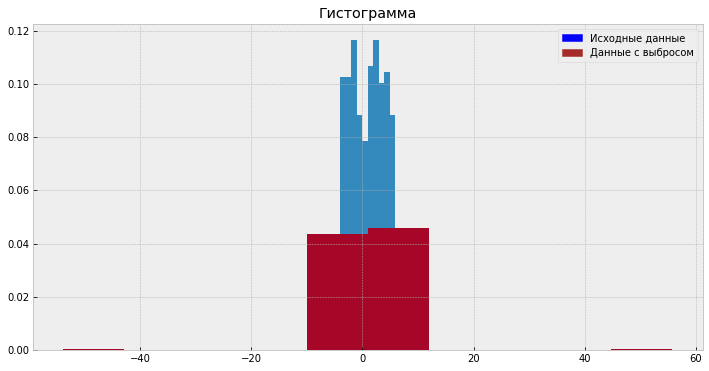

,Исходные данные,Данные c выбросом
Среднее,0.943443,0.944199
Стандартное отклонение,2.856339,5.972324
Дисперсия,8.158670,35.668656
Медиана,1.158803,1.158803
Первая квартиль,-1.565664,-1.624024
Третья квартиль,3.463819,3.510246
Коэффициент асимметрии,-0.024381,0.012087
Эксцесс,-1.237918,43.453348
Максимальное значение выборки,5.957706,55.714421
Минимальное значение выборки,-3.993637,-53.750352


In [13]:
L = functionsList[8](data) - functionsList[9](data)
Ldata = list(data)

for i in range(1, 6):
    Ldata.append((functionsList[8](data) + L * i))
    Ldata.append((functionsList[9](data) - L * i))
    
    
Lvalues = [[0] * 2 for i in range(10)]

for i in range(len(Lvalues)):
    for j in range(len(Lvalues[i])):
        if j == 0:
            Lvalues[i][j] = functionsList[i](data)
        else:
            Lvalues[i][j] = functionsList[i](Ldata)

plot.figure(figsize=(12, 6))
plot.hist(data, density=1, bins=10)
plot.hist(Ldata, density=1, bins=10)
plot.title('Гистограмма')

blue = mpatches.Patch(color='Blue', label='Исходные данные')
red = mpatches.Patch(color='#A52A2A', label='Данные c выбросом')
plot.legend(handles=[blue, red])
plot.show()

df = pd.DataFrame(Lvalues,
                  index=pd.Index(['Среднее', 'Стандартное отклонение', 'Дисперсия', 'Медиана', 'Первая квартиль', 'Третья квартиль', 'Коэффициент асимметрии', 'Эксцесс', 'Максимальное значение выборки', 'Минимальное значение выборки']),
                  columns=['Исходные данные', 'Данные c выбросом'])
df.style

<blockquote>
    <i>15. Добавить в выборку 10 элементов, больших или равных $x_{\max }+L$. Вычислить
числовые характеристики из пункта 2. Насколько сильно посчитанные числовые характеристики
отличаются от результатов, полученных по исходным данным? Почему?</i>
</blockquote>

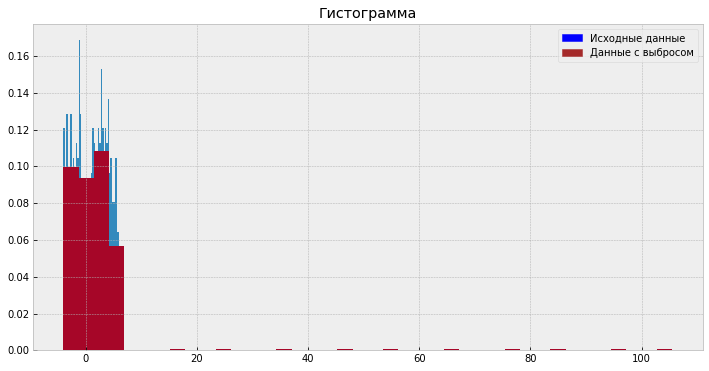

,Исходные данные,Данные c выбросом
Среднее,0.943443,2.114946
Стандартное отклонение,2.856339,9.624920
Дисперсия,8.158670,92.639086
Медиана,1.158803,1.232543
Первая квартиль,-1.565664,-1.454767
Третья квартиль,3.463819,3.560769
Коэффициент асимметрии,-0.024381,7.56502
Эксцесс,-1.237918,65.707287
Максимальное значение выборки,5.957706,105.471136
Минимальное значение выборки,-3.993637,-3.993637


In [14]:
L = functionsList[8](data) - functionsList[9](data)
Ldata = list(data)

for i in range(1, 11):
    Ldata.append((functionsList[8](data) + L * i))
    
Lvalues = [[0] * 2 for i in range(10)]

for i in range(len(Lvalues)):
    for j in range(len(Lvalues[i])):
        if j == 0:
            Lvalues[i][j] = functionsList[i](data)
        else:
            Lvalues[i][j] = functionsList[i](Ldata)

plot.figure(figsize=(12, 6))
plot.hist(data, density=1, bins=40)
plot.hist(Ldata, density=1, bins=40)
plot.title('Гистограмма')

blue = mpatches.Patch(color='Blue', label='Исходные данные')
red = mpatches.Patch(color='#A52A2A', label='Данные c выбросом')
plot.legend(handles=[blue, red])
plot.show()

df = pd.DataFrame(Lvalues,
                  index=pd.Index(['Среднее', 'Стандартное отклонение', 'Дисперсия', 'Медиана', 'Первая квартиль', 'Третья квартиль', 'Коэффициент асимметрии', 'Эксцесс', 'Максимальное значение выборки', 'Минимальное значение выборки']),
                  columns=['Исходные данные', 'Данные c выбросом'])
df.style